In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
import seaborn as sns

In [6]:
df = sns.load_dataset('mpg')

In [9]:
df = df.drop('name', axis = 1)

In [10]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [11]:
X = df.drop('mpg', axis = 1)
y = df['mpg']

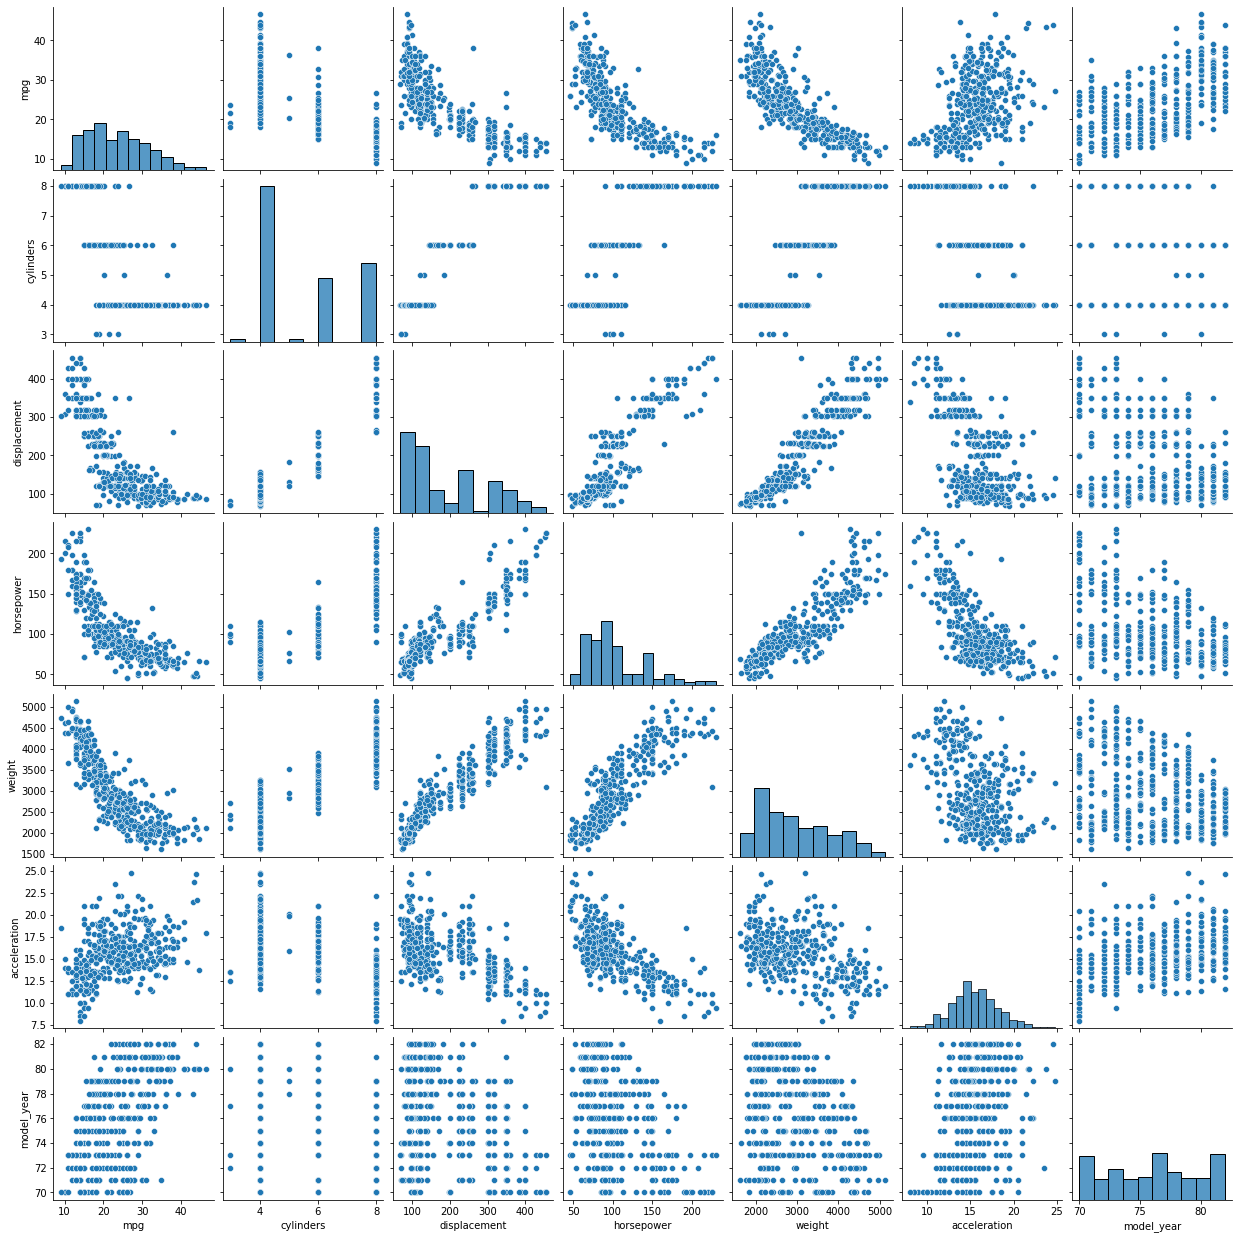

In [12]:
sns.pairplot(df)

In [14]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [15]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [16]:
df = pd.get_dummies(df, drop_first= True)

In [18]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,1


In [34]:
X = df.drop('mpg', axis = 1)
y = df[['mpg']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
for col in X_train.columns:
  if 'origin' not in col:
    scaler = StandardScaler()
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

In [38]:
y_test

,mpg
329,44.6
373,24.0
382,34.0
192,22.0
335,35.0
...,...
348,37.7
273,23.9
36,19.0
195,29.0


In [39]:
yscaler = StandardScaler()
y_train = yscaler.fit_transform(y_train)
y_test = yscaler.transform(y_test)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [112]:
model = Sequential(
  [Dense(units = 1, activation='sigmoid')]
)

In [113]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [114]:
history = model.fit(X_train, y_train,
                    epochs=98)

Epoch 1/98
10/10 [==============================] - 0s 2ms/step - loss: 0.7200
Epoch 2/98
10/10 [==============================] - 0s 2ms/step - loss: 0.3865
Epoch 3/98
10/10 [==============================] - 0s 2ms/step - loss: 0.3490
Epoch 4/98
10/10 [==============================] - 0s 2ms/step - loss: 0.3320
Epoch 5/98
10/10 [==============================] - 0s 3ms/step - loss: 0.3243
Epoch 6/98
10/10 [==============================] - 0s 2ms/step - loss: 0.3326
Epoch 7/98
10/10 [==============================] - 0s 2ms/step - loss: 0.3627
Epoch 8/98
10/10 [==============================] - 0s 2ms/step - loss: 0.3707
Epoch 9/98
10/10 [==============================] - 0s 2ms/step - loss: 0.3609
Epoch 10/98
10/10 [==============================] - 0s 2ms/step - loss: 0.3435
Epoch 11/98
10/10 [==============================] - 0s 3ms/step - loss: 0.3554
Epoch 12/98
10/10 [==============================] - 0s 3ms/step - loss: 0.3597
Epoch 13/98
10/10 [==============================

In [115]:
history_df = pd.DataFrame(history.history)

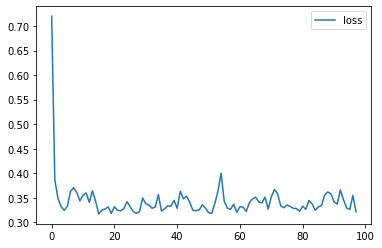

In [116]:
history_df.plot()

In [99]:
preds = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [100]:
from sklearn.metrics import mean_absolute_error

In [101]:
mean_absolute_error(y_test, preds)

0.33830603446902274

In [102]:
y_test.shape

(100, 1)

In [110]:
rv = np.linspace(min(y_test.flatten()),max(y_test.flatten()),300)

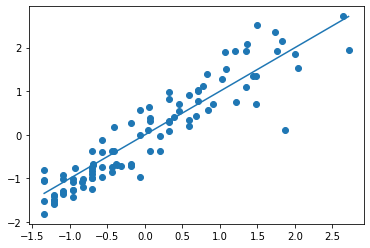

In [117]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test.flatten(), preds.flatten())
plt.plot(rv, rv)